In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deeptweets/sample_submission.csv
/kaggle/input/deeptweets/training.csv
/kaggle/input/deeptweets/train.csv
/kaggle/input/deeptweets/test.csv


In [2]:
import tensorflow as tf

D0716 15:21:58.574675808      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0716 15:21:58.574709443      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0716 15:21:58.574712828      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0716 15:21:58.574715471      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0716 15:21:58.574717985      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0716 15:21:58.574720593      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0716 15:21:58.574723021      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0716 15:21:58.

In [3]:
# Detect hardware, return appropriate distribution strategy (you can see that it is pretty easy to set up).
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Running on TPU  
Number of replicas: 8


In [4]:
# reading data
import pandas as pd
df_train = pd.read_csv('/kaggle/input/deeptweets/train.csv', encoding='latin-1')
print("Number of rows in the training set ",len(df_train))
df_train.head()

Number of rows in the training set  6525


,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [5]:
#Check missing values 
df_train.isna().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

<Axes: xlabel='Label'>

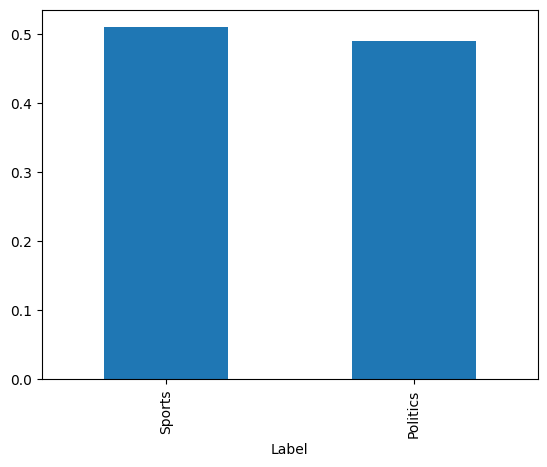

In [6]:
# check target balance
df_train['Label'].value_counts(normalize = True).plot.bar()

In [7]:
!pip install nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--


     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.5 MB 8.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 23.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/302.0 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 KB 20.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/772.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 KB 28.4 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/6.8 MB ? eta -:--:--


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/6.8 MB 6.8 MB/s eta 0:00:01


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/6.8 MB 28.9 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 6.6/6.8 MB 62.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 6.8/6.8 MB 62.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/45.9 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 3.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/3.2 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.2/3.2 MB 162.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 69.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/181.6 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 14.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/56.8 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 4.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/130.8 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 KB 10.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/493.5 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.5/493.5 KB 30.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/48.9 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 4.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/928.2 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.2/928.2 KB 45.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.2 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 5.2/10.2 MB 157.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 149.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.2/10.2 MB 149.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 76.3 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [9]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.8 MB ? eta -:--:--


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/12.8 MB 9.6 MB/s eta 0:00:02


     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/12.8 MB 45.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 8.4/12.8 MB 80.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 12.8/12.8 MB 145.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 12.8/12.8 MB 145.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Text Preprocessing

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from spacy import load
import warnings

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

nlp = load('en_core_web_sm')

# Copy the WordNet data
nltk.data.path.append("/usr/share/nltk_data")
nltk.download('wordnet')

warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...


[nltk_data]   Unzipping corpora/wordnet2022.zip.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


This is where all text cleaning takes place. It’s a loop that iterates through all 6525 rows and does the following:

. Remove all special characters

. Lowercase all the words

. Tokenize

. Remove stopwords

. Lemmatize

In [11]:
# preprocessing 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def preprocessing(text):
    corpus = []
    for i in range(len(text)):
# Replace all non-alphabetic characters with spaces
        r = re.sub('[^a-zA-Z]', ' ', text[i])
        r = re.sub('[@#]', '', r)  # Remove @ and # symbols
        r = re.sub('(http|https)://[^\s]*', '', r)  # Remove URLs starting with http or https      
 # Convert all characters to lowercase
        r = r.lower()
# Split the text into individual words
        r = r.split()
# Remove English stop words
        r = [word for word in r if word not in stopwords.words('english')]
# Reduce each word to its base form
        r = [lemmatizer.lemmatize(word) for word in r]
# Join the words back into a single string
        r = ' '.join(r)
# Add the preprocessed text to the corpus list
        corpus.append(r)
    return corpus
# create a list text from the 'TweetText' column 
text = list(df_train['TweetText'])
# Preprocess the text using the 'preprocessing' function
df_train['TweetText'] = preprocessing(text)
df_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,seckerry value statedept usaid measured dollar...
1,304834304222064640,Politics,rraina fear
2,303568995880144898,Sports,watch video highlight wwc final australia west...
3,304366580664528896,Sports,rt chelscanlan nitro circus albertpark theymak...
4,296770931098009601,Sports,cricketfox always good thing thanks feedback


In [12]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.2 MB ? eta -:--:--


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/7.2 MB 7.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/7.2 MB 31.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.2/7.2 MB 69.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.2/7.2 MB 69.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 46.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.3 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/268.8 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 KB 19.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 5.2/7.8 MB 157.1 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.8/7.8 MB 152.5 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/163.8 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 KB 13.7 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/293.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 286.7/293.3 KB 8.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [14]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/11.1 MB ? eta -:--:--


     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/11.1 MB 7.2 MB/s eta 0:00:02


     ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/11.1 MB 23.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 6.3/11.1 MB 60.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 11.0/11.1 MB 125.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 11.0/11.1 MB 125.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 66.7 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


# Tokenize & encode

In [15]:
# Import train_test_split for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split  
# Import RobertaTokenizer For tokenizing the input text data
from transformers import RobertaTokenizer 
# Import accuracy_score For calculating the accuracy of model predictions
from sklearn.metrics import accuracy_score  
# Import warnings managing and suppressing warnings
import warnings  
# Ignore any warnings that occur during execution
warnings.filterwarnings("ignore")  

In [16]:
# Configurations
MODEL_NAME = 'roberta-base'  # Name of the pre-trained RoBERTa model to be used
MAX_LEN = 256  # Maximum length of input sequences
ARTIFACTS_PATH = '../artifacts/'  # Path to the directory where artifacts will be stored

BATCH_SIZE = 32 # Batch size for training
EPOCHS = 3  # Number of training epochs

# Create the artifacts directory if it doesn't exist
if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)


In [17]:
# Split the data into input features (X) and labels (y)
X_data = df_train['TweetText'].values
y_data = df_train['Label'].values

# Transform categories into numbers
label_to_id = {}
id_to_label = {}
for index, label in enumerate(y_data):
    if label not in label_to_id:
        label_id = len(label_to_id)
        label_to_id[label] = label_id
        id_to_label[label_id] = label

    y_data[index] = label_to_id[label]

# Display label mapping
print("Label to ID mapping:")
print(label_to_id)

Label to ID mapping:
{'Politics': 0, 'Sports': 1}


In [18]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=777)

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

# Function to encode the text using the tokenizer
def roberta_encode(texts, tokenizer):
    input_ids = []
    attention_mask = []

    for text in texts:
        encoding = tokenizer.encode_plus(
            text,
            max_length=MAX_LEN,
            padding='max_length',
            truncation=True,
            return_tensors='tf'
        )
        input_ids.append(encoding['input_ids'])
        attention_mask.append(encoding['attention_mask'])

    return {
        'input_word_ids': tf.concat(input_ids, axis=0),
        'input_mask': tf.concat(attention_mask, axis=0),
    }

# Encode the data
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')

print(X_train)

{'input_word_ids': <tf.Tensor: shape=(4567, 256), dtype=int32, numpy=
array([[    0,  9713,   475, ...,     1,     1,     1],
       [    0,  9713,    78, ...,     1,     1,     1],
       [    0,   620,  1296, ...,     1,     1,     1],
       ...,
       [    0,   620,  1296, ...,     1,     1,     1],
       [    0,  9713,  2854, ...,     1,     1,     1],
       [    0, 11557,  2175, ...,     1,     1,     1]], dtype=int32)>, 'input_mask': <tf.Tensor: shape=(4567, 256), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}


# Create RoBERTa model

In [19]:
import tensorflow as tf
from transformers import TFRobertaModel
# Create the RoBERTa model
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

# Define the input layers
input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids")
input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_mask")

# Apply the RoBERTa model to the input layers
roberta_output = roberta_model(input_word_ids, attention_mask=input_mask)[0]

# Add a pooling layer
pooler_output = tf.keras.layers.GlobalAveragePooling1D()(roberta_output)

# Add a dense output layer
output = tf.keras.layers.Dense(len(label_to_id), activation='softmax')(pooler_output)

# Create the model
model = tf.keras.Model(inputs=[input_word_ids, input_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).


Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model"


__________________________________________________________________________________________________


 Layer (type)                   Output Shape         Param #     Connected to                     


 input_word_ids (InputLayer)    [(None, 256)]        0           []                               


 input_mask (InputLayer)        [(None, 256)]        0           []                               


 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         


 el)                            thPoolingAndCrossAt               'input_mask[0][0]']             


                                tentions(last_hidde                                               


                                n_state=(None, 256,                                               


                                 768),                                                            


                                 pooler_output=(Non                                               


                                e, 768),                                                          


                                 past_key_values=No                                               


                                ne, hidden_states=N                                               


                                one, attentions=Non                                               


                                e, cross_attentions                                               


                                =None)                                                            


 global_average_pooling1d (Glob  (None, 768)         0           ['tf_roberta_model[0][0]']       


 alAveragePooling1D)                                                                              


 dense (Dense)                  (None, 2)            1538        ['global_average_pooling1d[0][0]'


                                                                 ]                                


Total params: 124,647,170


Trainable params: 124,647,170


Non-trainable params: 0


__________________________________________________________________________________________________


# Train model

In [20]:
# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)



Epoch 1/3



  1/143 [..............................] - ETA: 1:35:59 - loss: 0.7346 - accuracy: 0.5625


  2/143 [..............................] - ETA: 21:02 - loss: 0.6987 - accuracy: 0.5938  


  3/143 [..............................] - ETA: 20:49 - loss: 0.6962 - accuracy: 0.5729


  4/143 [..............................] - ETA: 20:35 - loss: 0.6880 - accuracy: 0.5703


  5/143 [>.............................] - ETA: 20:22 - loss: 0.6829 - accuracy: 0.5875


  6/143 [>.............................] - ETA: 20:17 - loss: 0.6796 - accuracy: 0.5885


  7/143 [>.............................] - ETA: 20:09 - loss: 0.6716 - accuracy: 0.6027


  8/143 [>.............................] - ETA: 20:01 - loss: 0.6640 - accuracy: 0.6094


  9/143 [>.............................] - ETA: 19:50 - loss: 0.6593 - accuracy: 0.6111


 10/143 [=>............................] - ETA: 19:40 - loss: 0.6492 - accuracy: 0.6187


 11/143 [=>............................] - ETA: 19:28 - loss: 0.6361 - accuracy: 0.6392


 12/143 [=>............................] - ETA: 19:20 - loss: 0.6232 - accuracy: 0.6536


 13/143 [=>............................] - ETA: 19:13 - loss: 0.6102 - accuracy: 0.6707


 14/143 [=>............................] - ETA: 19:03 - loss: 0.5956 - accuracy: 0.6853


 15/143 [==>...........................] - ETA: 18:53 - loss: 0.5810 - accuracy: 0.6979


 16/143 [==>...........................] - ETA: 18:44 - loss: 0.5721 - accuracy: 0.7051


 17/143 [==>...........................] - ETA: 18:35 - loss: 0.5606 - accuracy: 0.7132


 18/143 [==>...........................] - ETA: 18:27 - loss: 0.5361 - accuracy: 0.7274


 19/143 [==>...........................] - ETA: 18:18 - loss: 0.5197 - accuracy: 0.7385


 20/143 [===>..........................] - ETA: 18:10 - loss: 0.5035 - accuracy: 0.7484


 21/143 [===>..........................] - ETA: 18:02 - loss: 0.5004 - accuracy: 0.7515


 22/143 [===>..........................] - ETA: 17:53 - loss: 0.4921 - accuracy: 0.7585


 23/143 [===>..........................] - ETA: 17:44 - loss: 0.4777 - accuracy: 0.7663


 24/143 [====>.........................] - ETA: 17:36 - loss: 0.4773 - accuracy: 0.7669


 25/143 [====>.........................] - ETA: 17:28 - loss: 0.4775 - accuracy: 0.7663


 26/143 [====>.........................] - ETA: 17:19 - loss: 0.4650 - accuracy: 0.7728


 27/143 [====>.........................] - ETA: 17:10 - loss: 0.4618 - accuracy: 0.7731


 28/143 [====>.........................] - ETA: 17:01 - loss: 0.4593 - accuracy: 0.7757


 29/143 [=====>........................] - ETA: 16:53 - loss: 0.4482 - accuracy: 0.7812


 30/143 [=====>........................] - ETA: 16:43 - loss: 0.4425 - accuracy: 0.7833


 31/143 [=====>........................] - ETA: 16:34 - loss: 0.4362 - accuracy: 0.7873


 32/143 [=====>........................] - ETA: 16:25 - loss: 0.4279 - accuracy: 0.7910


 33/143 [=====>........................] - ETA: 16:16 - loss: 0.4254 - accuracy: 0.7917


 34/143 [======>.......................] - ETA: 16:07 - loss: 0.4221 - accuracy: 0.7941


 35/143 [======>.......................] - ETA: 15:58 - loss: 0.4217 - accuracy: 0.7929


 36/143 [======>.......................] - ETA: 15:50 - loss: 0.4221 - accuracy: 0.7925


 37/143 [======>.......................] - ETA: 15:40 - loss: 0.4154 - accuracy: 0.7956


 38/143 [======>.......................] - ETA: 15:32 - loss: 0.4100 - accuracy: 0.7985


 39/143 [=======>......................] - ETA: 15:23 - loss: 0.4032 - accuracy: 0.8029


 40/143 [=======>......................] - ETA: 15:14 - loss: 0.3981 - accuracy: 0.8039


 41/143 [=======>......................] - ETA: 15:05 - loss: 0.3934 - accuracy: 0.8064


 42/143 [=======>......................] - ETA: 14:56 - loss: 0.3912 - accuracy: 0.8073


 43/143 [========>.....................] - ETA: 14:48 - loss: 0.3854 - accuracy: 0.8110


 44/143 [========>.....................] - ETA: 14:38 - loss: 0.3830 - accuracy: 0.8132


 45/143 [========>.....................] - ETA: 14:29 - loss: 0.3792 - accuracy: 0.8153


 46/143 [========>.....................] - ETA: 14:20 - loss: 0.3751 - accuracy: 0.8179


 47/143 [========>.....................] - ETA: 14:11 - loss: 0.3709 - accuracy: 0.8198


 48/143 [=========>....................] - ETA: 14:03 - loss: 0.3656 - accuracy: 0.8229


 49/143 [=========>....................] - ETA: 13:53 - loss: 0.3637 - accuracy: 0.8240


 50/143 [=========>....................] - ETA: 13:44 - loss: 0.3600 - accuracy: 0.8269


 51/143 [=========>....................] - ETA: 13:36 - loss: 0.3565 - accuracy: 0.8290


 52/143 [=========>....................] - ETA: 13:27 - loss: 0.3551 - accuracy: 0.8299


 53/143 [==========>...................] - ETA: 13:18 - loss: 0.3519 - accuracy: 0.8314


 54/143 [==========>...................] - ETA: 13:09 - loss: 0.3485 - accuracy: 0.8333


 55/143 [==========>...................] - ETA: 13:00 - loss: 0.3473 - accuracy: 0.8352


 56/143 [==========>...................] - ETA: 12:51 - loss: 0.3447 - accuracy: 0.8365


 57/143 [==========>...................] - ETA: 12:42 - loss: 0.3397 - accuracy: 0.8394


 58/143 [===========>..................] - ETA: 12:33 - loss: 0.3364 - accuracy: 0.8416


 59/143 [===========>..................] - ETA: 12:24 - loss: 0.3346 - accuracy: 0.8422


 60/143 [===========>..................] - ETA: 12:15 - loss: 0.3369 - accuracy: 0.8422


 61/143 [===========>..................] - ETA: 12:07 - loss: 0.3359 - accuracy: 0.8432


 62/143 [============>.................] - ETA: 11:58 - loss: 0.3353 - accuracy: 0.8438


 63/143 [============>.................] - ETA: 11:49 - loss: 0.3328 - accuracy: 0.8447


 64/143 [============>.................] - ETA: 11:40 - loss: 0.3305 - accuracy: 0.8462


 65/143 [============>.................] - ETA: 11:31 - loss: 0.3278 - accuracy: 0.8476


 66/143 [============>.................] - ETA: 11:22 - loss: 0.3239 - accuracy: 0.8499


 67/143 [=============>................] - ETA: 11:14 - loss: 0.3210 - accuracy: 0.8512


 68/143 [=============>................] - ETA: 11:05 - loss: 0.3194 - accuracy: 0.8525


 69/143 [=============>................] - ETA: 10:56 - loss: 0.3170 - accuracy: 0.8537


 70/143 [=============>................] - ETA: 10:47 - loss: 0.3143 - accuracy: 0.8554


 71/143 [=============>................] - ETA: 10:38 - loss: 0.3115 - accuracy: 0.8574


 72/143 [==============>...............] - ETA: 10:29 - loss: 0.3088 - accuracy: 0.8589


 73/143 [==============>...............] - ETA: 10:20 - loss: 0.3057 - accuracy: 0.8604


 74/143 [==============>...............] - ETA: 10:11 - loss: 0.3035 - accuracy: 0.8611


 75/143 [==============>...............] - ETA: 10:02 - loss: 0.3041 - accuracy: 0.8612


 76/143 [==============>...............] - ETA: 9:53 - loss: 0.3024 - accuracy: 0.8623 


 77/143 [===============>..............] - ETA: 9:44 - loss: 0.3018 - accuracy: 0.8628


 78/143 [===============>..............] - ETA: 9:36 - loss: 0.3016 - accuracy: 0.8634


 79/143 [===============>..............] - ETA: 9:27 - loss: 0.2998 - accuracy: 0.8643


 80/143 [===============>..............] - ETA: 9:18 - loss: 0.2989 - accuracy: 0.8652


 81/143 [===============>..............] - ETA: 9:09 - loss: 0.2963 - accuracy: 0.8665


 82/143 [================>.............] - ETA: 9:00 - loss: 0.2944 - accuracy: 0.8670


 83/143 [================>.............] - ETA: 8:51 - loss: 0.2937 - accuracy: 0.8675


 84/143 [================>.............] - ETA: 8:42 - loss: 0.2933 - accuracy: 0.8676


 85/143 [================>.............] - ETA: 8:34 - loss: 0.2933 - accuracy: 0.8676


 86/143 [=================>............] - ETA: 8:25 - loss: 0.2931 - accuracy: 0.8681


 87/143 [=================>............] - ETA: 8:16 - loss: 0.2928 - accuracy: 0.8675


 88/143 [=================>............] - ETA: 8:07 - loss: 0.2911 - accuracy: 0.8683


 89/143 [=================>............] - ETA: 7:58 - loss: 0.2905 - accuracy: 0.8680


 90/143 [=================>............] - ETA: 7:49 - loss: 0.2917 - accuracy: 0.8684


 91/143 [==================>...........] - ETA: 7:40 - loss: 0.2916 - accuracy: 0.8681


 92/143 [==================>...........] - ETA: 7:31 - loss: 0.2891 - accuracy: 0.8696


 93/143 [==================>...........] - ETA: 7:23 - loss: 0.2879 - accuracy: 0.8696


 94/143 [==================>...........] - ETA: 7:14 - loss: 0.2864 - accuracy: 0.8703


 95/143 [==================>...........] - ETA: 7:05 - loss: 0.2857 - accuracy: 0.8711


 96/143 [===================>..........] - ETA: 6:56 - loss: 0.2837 - accuracy: 0.8721


 97/143 [===================>..........] - ETA: 6:47 - loss: 0.2834 - accuracy: 0.8721


 98/143 [===================>..........] - ETA: 6:38 - loss: 0.2814 - accuracy: 0.8731


 99/143 [===================>..........] - ETA: 6:29 - loss: 0.2793 - accuracy: 0.8744


100/143 [===================>..........] - ETA: 6:20 - loss: 0.2781 - accuracy: 0.8747


101/143 [====================>.........] - ETA: 6:12 - loss: 0.2774 - accuracy: 0.8753


102/143 [====================>.........] - ETA: 6:03 - loss: 0.2753 - accuracy: 0.8765


103/143 [====================>.........] - ETA: 5:54 - loss: 0.2744 - accuracy: 0.8768


104/143 [====================>.........] - ETA: 5:45 - loss: 0.2744 - accuracy: 0.8765


105/143 [=====================>........] - ETA: 5:36 - loss: 0.2746 - accuracy: 0.8762


106/143 [=====================>........] - ETA: 5:27 - loss: 0.2732 - accuracy: 0.8768


107/143 [=====================>........] - ETA: 5:18 - loss: 0.2724 - accuracy: 0.8773


108/143 [=====================>........] - ETA: 5:09 - loss: 0.2713 - accuracy: 0.8776


109/143 [=====================>........] - ETA: 5:00 - loss: 0.2724 - accuracy: 0.8776


110/143 [======================>.......] - ETA: 4:52 - loss: 0.2711 - accuracy: 0.8784


111/143 [======================>.......] - ETA: 4:43 - loss: 0.2709 - accuracy: 0.8787


112/143 [======================>.......] - ETA: 4:34 - loss: 0.2700 - accuracy: 0.8795


113/143 [======================>.......] - ETA: 4:25 - loss: 0.2682 - accuracy: 0.8803


114/143 [======================>.......] - ETA: 4:16 - loss: 0.2670 - accuracy: 0.8810


115/143 [=======================>......] - ETA: 4:07 - loss: 0.2656 - accuracy: 0.8815


116/143 [=======================>......] - ETA: 3:58 - loss: 0.2640 - accuracy: 0.8820


117/143 [=======================>......] - ETA: 3:50 - loss: 0.2652 - accuracy: 0.8814


118/143 [=======================>......] - ETA: 3:41 - loss: 0.2665 - accuracy: 0.8811


119/143 [=======================>......] - ETA: 3:32 - loss: 0.2665 - accuracy: 0.8813


120/143 [========================>.....] - ETA: 3:23 - loss: 0.2671 - accuracy: 0.8807


121/143 [========================>.....] - ETA: 3:14 - loss: 0.2658 - accuracy: 0.8812


122/143 [========================>.....] - ETA: 3:05 - loss: 0.2643 - accuracy: 0.8819


123/143 [========================>.....] - ETA: 2:56 - loss: 0.2624 - accuracy: 0.8829


124/143 [=========================>....] - ETA: 2:47 - loss: 0.2613 - accuracy: 0.8833


125/143 [=========================>....] - ETA: 2:39 - loss: 0.2600 - accuracy: 0.8840


126/143 [=========================>....] - ETA: 2:30 - loss: 0.2605 - accuracy: 0.8837


127/143 [=========================>....] - ETA: 2:21 - loss: 0.2600 - accuracy: 0.8839


128/143 [=========================>....] - ETA: 2:12 - loss: 0.2589 - accuracy: 0.8843


129/143 [==========================>...] - ETA: 2:03 - loss: 0.2578 - accuracy: 0.8849


130/143 [==========================>...] - ETA: 1:54 - loss: 0.2566 - accuracy: 0.8856


131/143 [==========================>...] - ETA: 1:46 - loss: 0.2554 - accuracy: 0.8860


132/143 [==========================>...] - ETA: 1:37 - loss: 0.2544 - accuracy: 0.8861


133/143 [==========================>...] - ETA: 1:28 - loss: 0.2547 - accuracy: 0.8860


134/143 [===========================>..] - ETA: 1:19 - loss: 0.2540 - accuracy: 0.8867


135/143 [===========================>..] - ETA: 1:10 - loss: 0.2531 - accuracy: 0.8873


136/143 [===========================>..] - ETA: 1:01 - loss: 0.2516 - accuracy: 0.8881


137/143 [===========================>..] - ETA: 53s - loss: 0.2514 - accuracy: 0.8882 


138/143 [===========================>..] - ETA: 44s - loss: 0.2520 - accuracy: 0.8881


139/143 [============================>.] - ETA: 35s - loss: 0.2513 - accuracy: 0.8883


140/143 [============================>.] - ETA: 26s - loss: 0.2514 - accuracy: 0.8886


141/143 [============================>.] - ETA: 17s - loss: 0.2502 - accuracy: 0.8892


142/143 [============================>.] - ETA: 8s - loss: 0.2488 - accuracy: 0.8900 


143/143 [==============================] - ETA: 0s - loss: 0.2489 - accuracy: 0.8899


143/143 [==============================] - 1486s 10s/step - loss: 0.2489 - accuracy: 0.8899 - val_loss: 0.1486 - val_accuracy: 0.9392


Epoch 2/3



  1/143 [..............................] - ETA: 20:55 - loss: 0.0623 - accuracy: 0.9688


  2/143 [..............................] - ETA: 20:26 - loss: 0.1101 - accuracy: 0.9375


  3/143 [..............................] - ETA: 20:23 - loss: 0.0968 - accuracy: 0.9583


  4/143 [..............................] - ETA: 20:15 - loss: 0.1710 - accuracy: 0.9453


  5/143 [>.............................] - ETA: 20:08 - loss: 0.1622 - accuracy: 0.9438


  6/143 [>.............................] - ETA: 20:00 - loss: 0.1453 - accuracy: 0.9531


  7/143 [>.............................] - ETA: 19:53 - loss: 0.1320 - accuracy: 0.9598


  8/143 [>.............................] - ETA: 19:46 - loss: 0.1308 - accuracy: 0.9570


  9/143 [>.............................] - ETA: 19:37 - loss: 0.1223 - accuracy: 0.9618


 10/143 [=>............................] - ETA: 19:29 - loss: 0.1196 - accuracy: 0.9625


 11/143 [=>............................] - ETA: 19:20 - loss: 0.1162 - accuracy: 0.9631


 12/143 [=>............................] - ETA: 19:10 - loss: 0.1179 - accuracy: 0.9635


 13/143 [=>............................] - ETA: 19:01 - loss: 0.1211 - accuracy: 0.9615


 14/143 [=>............................] - ETA: 18:51 - loss: 0.1283 - accuracy: 0.9598


 15/143 [==>...........................] - ETA: 18:42 - loss: 0.1289 - accuracy: 0.9583


 16/143 [==>...........................] - ETA: 18:34 - loss: 0.1304 - accuracy: 0.9570


 17/143 [==>...........................] - ETA: 18:26 - loss: 0.1322 - accuracy: 0.9577


 18/143 [==>...........................] - ETA: 18:17 - loss: 0.1366 - accuracy: 0.9531


 19/143 [==>...........................] - ETA: 18:08 - loss: 0.1323 - accuracy: 0.9556


 20/143 [===>..........................] - ETA: 18:00 - loss: 0.1310 - accuracy: 0.9547


 21/143 [===>..........................] - ETA: 17:51 - loss: 0.1347 - accuracy: 0.9539


 22/143 [===>..........................] - ETA: 17:43 - loss: 0.1319 - accuracy: 0.9531


 23/143 [===>..........................] - ETA: 17:34 - loss: 0.1298 - accuracy: 0.9538


 24/143 [====>.........................] - ETA: 17:25 - loss: 0.1259 - accuracy: 0.9557


 25/143 [====>.........................] - ETA: 17:15 - loss: 0.1307 - accuracy: 0.9550


 26/143 [====>.........................] - ETA: 17:06 - loss: 0.1300 - accuracy: 0.9555


 27/143 [====>.........................] - ETA: 16:58 - loss: 0.1287 - accuracy: 0.9560


 28/143 [====>.........................] - ETA: 16:50 - loss: 0.1276 - accuracy: 0.9554


 29/143 [=====>........................] - ETA: 16:41 - loss: 0.1244 - accuracy: 0.9569


 30/143 [=====>........................] - ETA: 16:32 - loss: 0.1215 - accuracy: 0.9583


 31/143 [=====>........................] - ETA: 16:23 - loss: 0.1191 - accuracy: 0.9597


 32/143 [=====>........................] - ETA: 16:15 - loss: 0.1166 - accuracy: 0.9609


 33/143 [=====>........................] - ETA: 16:06 - loss: 0.1178 - accuracy: 0.9593


 34/143 [======>.......................] - ETA: 15:57 - loss: 0.1196 - accuracy: 0.9577


 35/143 [======>.......................] - ETA: 15:48 - loss: 0.1276 - accuracy: 0.9554


 36/143 [======>.......................] - ETA: 15:39 - loss: 0.1275 - accuracy: 0.9549


 37/143 [======>.......................] - ETA: 15:31 - loss: 0.1248 - accuracy: 0.9561


 38/143 [======>.......................] - ETA: 15:22 - loss: 0.1260 - accuracy: 0.9556


 39/143 [=======>......................] - ETA: 15:13 - loss: 0.1274 - accuracy: 0.9551


 40/143 [=======>......................] - ETA: 15:04 - loss: 0.1269 - accuracy: 0.9555


 41/143 [=======>......................] - ETA: 14:55 - loss: 0.1248 - accuracy: 0.9566


 42/143 [=======>......................] - ETA: 14:46 - loss: 0.1271 - accuracy: 0.9554


 43/143 [========>.....................] - ETA: 14:37 - loss: 0.1261 - accuracy: 0.9557


 44/143 [========>.....................] - ETA: 14:29 - loss: 0.1267 - accuracy: 0.9545


 45/143 [========>.....................] - ETA: 14:20 - loss: 0.1295 - accuracy: 0.9542


 46/143 [========>.....................] - ETA: 14:11 - loss: 0.1318 - accuracy: 0.9524


 47/143 [========>.....................] - ETA: 14:03 - loss: 0.1331 - accuracy: 0.9521


 48/143 [=========>....................] - ETA: 13:54 - loss: 0.1327 - accuracy: 0.9525


 49/143 [=========>....................] - ETA: 13:45 - loss: 0.1316 - accuracy: 0.9528


 50/143 [=========>....................] - ETA: 13:36 - loss: 0.1343 - accuracy: 0.9506


 51/143 [=========>....................] - ETA: 13:27 - loss: 0.1332 - accuracy: 0.9516


 52/143 [=========>....................] - ETA: 13:19 - loss: 0.1325 - accuracy: 0.9519


 53/143 [==========>...................] - ETA: 13:10 - loss: 0.1312 - accuracy: 0.9522


 54/143 [==========>...................] - ETA: 13:01 - loss: 0.1311 - accuracy: 0.9520


 55/143 [==========>...................] - ETA: 12:52 - loss: 0.1343 - accuracy: 0.9506


 56/143 [==========>...................] - ETA: 12:43 - loss: 0.1324 - accuracy: 0.9515


 57/143 [==========>...................] - ETA: 12:34 - loss: 0.1312 - accuracy: 0.9518


 58/143 [===========>..................] - ETA: 12:26 - loss: 0.1312 - accuracy: 0.9515


 59/143 [===========>..................] - ETA: 12:17 - loss: 0.1330 - accuracy: 0.9507


 60/143 [===========>..................] - ETA: 12:08 - loss: 0.1329 - accuracy: 0.9500


 61/143 [===========>..................] - ETA: 11:59 - loss: 0.1318 - accuracy: 0.9503


 62/143 [============>.................] - ETA: 11:50 - loss: 0.1316 - accuracy: 0.9501


 63/143 [============>.................] - ETA: 11:42 - loss: 0.1322 - accuracy: 0.9504


 64/143 [============>.................] - ETA: 11:33 - loss: 0.1335 - accuracy: 0.9497


 65/143 [============>.................] - ETA: 11:24 - loss: 0.1345 - accuracy: 0.9490


 66/143 [============>.................] - ETA: 11:15 - loss: 0.1364 - accuracy: 0.9484


 67/143 [=============>................] - ETA: 11:07 - loss: 0.1361 - accuracy: 0.9487


 68/143 [=============>................] - ETA: 10:58 - loss: 0.1349 - accuracy: 0.9494


 69/143 [=============>................] - ETA: 10:49 - loss: 0.1386 - accuracy: 0.9484


 70/143 [=============>................] - ETA: 10:40 - loss: 0.1381 - accuracy: 0.9487


 71/143 [=============>................] - ETA: 10:32 - loss: 0.1385 - accuracy: 0.9489


 72/143 [==============>...............] - ETA: 10:23 - loss: 0.1376 - accuracy: 0.9492


 73/143 [==============>...............] - ETA: 10:14 - loss: 0.1379 - accuracy: 0.9491


 74/143 [==============>...............] - ETA: 10:05 - loss: 0.1371 - accuracy: 0.9493


 75/143 [==============>...............] - ETA: 9:57 - loss: 0.1368 - accuracy: 0.9492 


 76/143 [==============>...............] - ETA: 9:48 - loss: 0.1366 - accuracy: 0.9490


 77/143 [===============>..............] - ETA: 9:39 - loss: 0.1362 - accuracy: 0.9497


 78/143 [===============>..............] - ETA: 9:30 - loss: 0.1361 - accuracy: 0.9491


 79/143 [===============>..............] - ETA: 9:22 - loss: 0.1404 - accuracy: 0.9478


 80/143 [===============>..............] - ETA: 9:13 - loss: 0.1401 - accuracy: 0.9480


 81/143 [===============>..............] - ETA: 9:04 - loss: 0.1396 - accuracy: 0.9487


 82/143 [================>.............] - ETA: 8:55 - loss: 0.1383 - accuracy: 0.9493


 83/143 [================>.............] - ETA: 8:47 - loss: 0.1382 - accuracy: 0.9495


 84/143 [================>.............] - ETA: 8:38 - loss: 0.1374 - accuracy: 0.9498


 85/143 [================>.............] - ETA: 8:29 - loss: 0.1390 - accuracy: 0.9493


 86/143 [=================>............] - ETA: 8:20 - loss: 0.1383 - accuracy: 0.9495


 87/143 [=================>............] - ETA: 8:11 - loss: 0.1389 - accuracy: 0.9486


 88/143 [=================>............] - ETA: 8:03 - loss: 0.1385 - accuracy: 0.9489


 89/143 [=================>............] - ETA: 7:54 - loss: 0.1387 - accuracy: 0.9487


 90/143 [=================>............] - ETA: 7:45 - loss: 0.1386 - accuracy: 0.9490


 91/143 [==================>...........] - ETA: 7:36 - loss: 0.1383 - accuracy: 0.9492


 92/143 [==================>...........] - ETA: 7:27 - loss: 0.1379 - accuracy: 0.9490


 93/143 [==================>...........] - ETA: 7:19 - loss: 0.1387 - accuracy: 0.9486


 94/143 [==================>...........] - ETA: 7:10 - loss: 0.1383 - accuracy: 0.9481


 95/143 [==================>...........] - ETA: 7:01 - loss: 0.1379 - accuracy: 0.9484


 96/143 [===================>..........] - ETA: 6:52 - loss: 0.1369 - accuracy: 0.9486


 97/143 [===================>..........] - ETA: 6:44 - loss: 0.1361 - accuracy: 0.9488


 98/143 [===================>..........] - ETA: 6:35 - loss: 0.1350 - accuracy: 0.9493


 99/143 [===================>..........] - ETA: 6:26 - loss: 0.1338 - accuracy: 0.9498


100/143 [===================>..........] - ETA: 6:17 - loss: 0.1325 - accuracy: 0.9503


101/143 [====================>.........] - ETA: 6:08 - loss: 0.1331 - accuracy: 0.9496


102/143 [====================>.........] - ETA: 6:00 - loss: 0.1323 - accuracy: 0.9498


103/143 [====================>.........] - ETA: 5:51 - loss: 0.1322 - accuracy: 0.9499


104/143 [====================>.........] - ETA: 5:42 - loss: 0.1317 - accuracy: 0.9501


105/143 [=====================>........] - ETA: 5:33 - loss: 0.1315 - accuracy: 0.9500


106/143 [=====================>........] - ETA: 5:24 - loss: 0.1326 - accuracy: 0.9502


107/143 [=====================>........] - ETA: 5:16 - loss: 0.1341 - accuracy: 0.9498


108/143 [=====================>........] - ETA: 5:07 - loss: 0.1340 - accuracy: 0.9497


109/143 [=====================>........] - ETA: 4:58 - loss: 0.1354 - accuracy: 0.9493


110/143 [======================>.......] - ETA: 4:49 - loss: 0.1354 - accuracy: 0.9491


111/143 [======================>.......] - ETA: 4:41 - loss: 0.1349 - accuracy: 0.9493


112/143 [======================>.......] - ETA: 4:32 - loss: 0.1347 - accuracy: 0.9495


113/143 [======================>.......] - ETA: 4:23 - loss: 0.1339 - accuracy: 0.9499


114/143 [======================>.......] - ETA: 4:14 - loss: 0.1329 - accuracy: 0.9504


115/143 [=======================>......] - ETA: 4:06 - loss: 0.1322 - accuracy: 0.9505


116/143 [=======================>......] - ETA: 3:57 - loss: 0.1320 - accuracy: 0.9504


117/143 [=======================>......] - ETA: 3:48 - loss: 0.1325 - accuracy: 0.9501


118/143 [=======================>......] - ETA: 3:39 - loss: 0.1317 - accuracy: 0.9505


119/143 [=======================>......] - ETA: 3:30 - loss: 0.1317 - accuracy: 0.9504


120/143 [========================>.....] - ETA: 3:22 - loss: 0.1314 - accuracy: 0.9503


121/143 [========================>.....] - ETA: 3:13 - loss: 0.1307 - accuracy: 0.9507


122/143 [========================>.....] - ETA: 3:04 - loss: 0.1302 - accuracy: 0.9508


123/143 [========================>.....] - ETA: 2:55 - loss: 0.1308 - accuracy: 0.9505


124/143 [=========================>....] - ETA: 2:47 - loss: 0.1307 - accuracy: 0.9506


125/143 [=========================>....] - ETA: 2:38 - loss: 0.1306 - accuracy: 0.9503


126/143 [=========================>....] - ETA: 2:29 - loss: 0.1304 - accuracy: 0.9501


127/143 [=========================>....] - ETA: 2:20 - loss: 0.1308 - accuracy: 0.9498


128/143 [=========================>....] - ETA: 2:11 - loss: 0.1301 - accuracy: 0.9502


129/143 [==========================>...] - ETA: 2:03 - loss: 0.1300 - accuracy: 0.9501


130/143 [==========================>...] - ETA: 1:54 - loss: 0.1292 - accuracy: 0.9505


131/143 [==========================>...] - ETA: 1:45 - loss: 0.1290 - accuracy: 0.9504


132/143 [==========================>...] - ETA: 1:36 - loss: 0.1287 - accuracy: 0.9505


133/143 [==========================>...] - ETA: 1:27 - loss: 0.1295 - accuracy: 0.9504


134/143 [===========================>..] - ETA: 1:19 - loss: 0.1295 - accuracy: 0.9506


135/143 [===========================>..] - ETA: 1:10 - loss: 0.1293 - accuracy: 0.9505


136/143 [===========================>..] - ETA: 1:01 - loss: 0.1286 - accuracy: 0.9508


137/143 [===========================>..] - ETA: 52s - loss: 0.1281 - accuracy: 0.9510 


138/143 [===========================>..] - ETA: 43s - loss: 0.1277 - accuracy: 0.9511


139/143 [============================>.] - ETA: 35s - loss: 0.1270 - accuracy: 0.9514


140/143 [============================>.] - ETA: 26s - loss: 0.1280 - accuracy: 0.9509


141/143 [============================>.] - ETA: 17s - loss: 0.1281 - accuracy: 0.9508


142/143 [============================>.] - ETA: 8s - loss: 0.1279 - accuracy: 0.9509 


143/143 [==============================] - ETA: 0s - loss: 0.1284 - accuracy: 0.9507


143/143 [==============================] - 1448s 10s/step - loss: 0.1284 - accuracy: 0.9507 - val_loss: 0.1400 - val_accuracy: 0.9428


Epoch 3/3



  1/143 [..............................] - ETA: 20:45 - loss: 0.1284 - accuracy: 0.9375


  2/143 [..............................] - ETA: 20:46 - loss: 0.0813 - accuracy: 0.9688


  3/143 [..............................] - ETA: 20:34 - loss: 0.0993 - accuracy: 0.9583


  4/143 [..............................] - ETA: 20:29 - loss: 0.0900 - accuracy: 0.9609


  5/143 [>.............................] - ETA: 20:21 - loss: 0.0779 - accuracy: 0.9688


  6/143 [>.............................] - ETA: 20:11 - loss: 0.0694 - accuracy: 0.9740


  7/143 [>.............................] - ETA: 20:03 - loss: 0.0735 - accuracy: 0.9643


  8/143 [>.............................] - ETA: 19:55 - loss: 0.0811 - accuracy: 0.9609


  9/143 [>.............................] - ETA: 19:47 - loss: 0.0819 - accuracy: 0.9583


 10/143 [=>............................] - ETA: 19:39 - loss: 0.0811 - accuracy: 0.9594


 11/143 [=>............................] - ETA: 19:30 - loss: 0.0785 - accuracy: 0.9574


 12/143 [=>............................] - ETA: 19:22 - loss: 0.0771 - accuracy: 0.9583


 13/143 [=>............................] - ETA: 19:13 - loss: 0.0738 - accuracy: 0.9615


 14/143 [=>............................] - ETA: 19:03 - loss: 0.0742 - accuracy: 0.9621


 15/143 [==>...........................] - ETA: 18:55 - loss: 0.0803 - accuracy: 0.9604


 16/143 [==>...........................] - ETA: 18:46 - loss: 0.0799 - accuracy: 0.9609


 17/143 [==>...........................] - ETA: 18:37 - loss: 0.0766 - accuracy: 0.9632


 18/143 [==>...........................] - ETA: 18:28 - loss: 0.0802 - accuracy: 0.9635


 19/143 [==>...........................] - ETA: 18:19 - loss: 0.0787 - accuracy: 0.9655


 20/143 [===>..........................] - ETA: 18:10 - loss: 0.0769 - accuracy: 0.9672


 21/143 [===>..........................] - ETA: 18:01 - loss: 0.0739 - accuracy: 0.9688


 22/143 [===>..........................] - ETA: 17:53 - loss: 0.0804 - accuracy: 0.9659


 23/143 [===>..........................] - ETA: 17:44 - loss: 0.0821 - accuracy: 0.9647


 24/143 [====>.........................] - ETA: 17:35 - loss: 0.0855 - accuracy: 0.9635


 25/143 [====>.........................] - ETA: 17:25 - loss: 0.0852 - accuracy: 0.9638


 26/143 [====>.........................] - ETA: 17:16 - loss: 0.0864 - accuracy: 0.9639


 27/143 [====>.........................] - ETA: 17:07 - loss: 0.0881 - accuracy: 0.9641


 28/143 [====>.........................] - ETA: 16:58 - loss: 0.0877 - accuracy: 0.9643


 29/143 [=====>........................] - ETA: 16:49 - loss: 0.0883 - accuracy: 0.9634


 30/143 [=====>........................] - ETA: 16:40 - loss: 0.0886 - accuracy: 0.9625


 31/143 [=====>........................] - ETA: 16:30 - loss: 0.0875 - accuracy: 0.9637


 32/143 [=====>........................] - ETA: 16:21 - loss: 0.0862 - accuracy: 0.9648


 33/143 [=====>........................] - ETA: 16:12 - loss: 0.0859 - accuracy: 0.9650


 34/143 [======>.......................] - ETA: 16:03 - loss: 0.0855 - accuracy: 0.9651


 35/143 [======>.......................] - ETA: 15:55 - loss: 0.0835 - accuracy: 0.9661


 36/143 [======>.......................] - ETA: 15:46 - loss: 0.0849 - accuracy: 0.9653


 37/143 [======>.......................] - ETA: 15:36 - loss: 0.0843 - accuracy: 0.9662


 38/143 [======>.......................] - ETA: 15:27 - loss: 0.0825 - accuracy: 0.9671


 39/143 [=======>......................] - ETA: 15:18 - loss: 0.0812 - accuracy: 0.9679


 40/143 [=======>......................] - ETA: 15:09 - loss: 0.0834 - accuracy: 0.9664


 41/143 [=======>......................] - ETA: 15:00 - loss: 0.0828 - accuracy: 0.9665


 42/143 [=======>......................] - ETA: 14:51 - loss: 0.0878 - accuracy: 0.9658


 43/143 [========>.....................] - ETA: 14:43 - loss: 0.0861 - accuracy: 0.9666


 44/143 [========>.....................] - ETA: 14:34 - loss: 0.0883 - accuracy: 0.9659


 45/143 [========>.....................] - ETA: 14:25 - loss: 0.0870 - accuracy: 0.9667


 46/143 [========>.....................] - ETA: 14:16 - loss: 0.0857 - accuracy: 0.9674


 47/143 [========>.....................] - ETA: 14:07 - loss: 0.0875 - accuracy: 0.9668


 48/143 [=========>....................] - ETA: 13:59 - loss: 0.0886 - accuracy: 0.9661


 49/143 [=========>....................] - ETA: 13:50 - loss: 0.0875 - accuracy: 0.9668


 50/143 [=========>....................] - ETA: 13:41 - loss: 0.0869 - accuracy: 0.9669


 51/143 [=========>....................] - ETA: 13:32 - loss: 0.0855 - accuracy: 0.9675


 52/143 [=========>....................] - ETA: 13:23 - loss: 0.0855 - accuracy: 0.9675


 53/143 [==========>...................] - ETA: 13:15 - loss: 0.0865 - accuracy: 0.9676


 54/143 [==========>...................] - ETA: 13:06 - loss: 0.0855 - accuracy: 0.9682


 55/143 [==========>...................] - ETA: 12:57 - loss: 0.0848 - accuracy: 0.9688


 56/143 [==========>...................] - ETA: 12:48 - loss: 0.0844 - accuracy: 0.9688


 57/143 [==========>...................] - ETA: 12:39 - loss: 0.0861 - accuracy: 0.9688


 58/143 [===========>..................] - ETA: 12:30 - loss: 0.0871 - accuracy: 0.9682


 59/143 [===========>..................] - ETA: 12:22 - loss: 0.0862 - accuracy: 0.9688


 60/143 [===========>..................] - ETA: 12:13 - loss: 0.0855 - accuracy: 0.9693


 61/143 [===========>..................] - ETA: 12:04 - loss: 0.0844 - accuracy: 0.9698


 62/143 [============>.................] - ETA: 11:55 - loss: 0.0850 - accuracy: 0.9693


 63/143 [============>.................] - ETA: 11:46 - loss: 0.0843 - accuracy: 0.9692


 64/143 [============>.................] - ETA: 11:37 - loss: 0.0836 - accuracy: 0.9697


 65/143 [============>.................] - ETA: 11:28 - loss: 0.0828 - accuracy: 0.9702


 66/143 [============>.................] - ETA: 11:19 - loss: 0.0820 - accuracy: 0.9702


 67/143 [=============>................] - ETA: 11:11 - loss: 0.0828 - accuracy: 0.9692


 68/143 [=============>................] - ETA: 11:02 - loss: 0.0820 - accuracy: 0.9697


 69/143 [=============>................] - ETA: 10:53 - loss: 0.0814 - accuracy: 0.9701


 70/143 [=============>................] - ETA: 10:44 - loss: 0.0806 - accuracy: 0.9705


 71/143 [=============>................] - ETA: 10:35 - loss: 0.0808 - accuracy: 0.9705


 72/143 [==============>...............] - ETA: 10:27 - loss: 0.0808 - accuracy: 0.9701


 73/143 [==============>...............] - ETA: 10:18 - loss: 0.0818 - accuracy: 0.9700


 74/143 [==============>...............] - ETA: 10:09 - loss: 0.0820 - accuracy: 0.9700


 75/143 [==============>...............] - ETA: 10:00 - loss: 0.0821 - accuracy: 0.9696


 76/143 [==============>...............] - ETA: 9:52 - loss: 0.0819 - accuracy: 0.9696 


 77/143 [===============>..............] - ETA: 9:43 - loss: 0.0814 - accuracy: 0.9700


 78/143 [===============>..............] - ETA: 9:34 - loss: 0.0810 - accuracy: 0.9700


 79/143 [===============>..............] - ETA: 9:25 - loss: 0.0817 - accuracy: 0.9699


 80/143 [===============>..............] - ETA: 9:16 - loss: 0.0819 - accuracy: 0.9699


 81/143 [===============>..............] - ETA: 9:08 - loss: 0.0820 - accuracy: 0.9699


 82/143 [================>.............] - ETA: 8:59 - loss: 0.0830 - accuracy: 0.9688


 83/143 [================>.............] - ETA: 8:50 - loss: 0.0826 - accuracy: 0.9688


 84/143 [================>.............] - ETA: 8:41 - loss: 0.0827 - accuracy: 0.9691


 85/143 [================>.............] - ETA: 8:32 - loss: 0.0828 - accuracy: 0.9691


 86/143 [=================>............] - ETA: 8:24 - loss: 0.0820 - accuracy: 0.9695


 87/143 [=================>............] - ETA: 8:15 - loss: 0.0838 - accuracy: 0.9688


 88/143 [=================>............] - ETA: 8:06 - loss: 0.0855 - accuracy: 0.9684


 89/143 [=================>............] - ETA: 7:57 - loss: 0.0850 - accuracy: 0.9684


 90/143 [=================>............] - ETA: 7:48 - loss: 0.0846 - accuracy: 0.9688


 91/143 [==================>...........] - ETA: 7:39 - loss: 0.0847 - accuracy: 0.9688


 92/143 [==================>...........] - ETA: 7:30 - loss: 0.0844 - accuracy: 0.9688


 93/143 [==================>...........] - ETA: 7:22 - loss: 0.0840 - accuracy: 0.9691


 94/143 [==================>...........] - ETA: 7:13 - loss: 0.0843 - accuracy: 0.9688


 95/143 [==================>...........] - ETA: 7:04 - loss: 0.0838 - accuracy: 0.9688


 96/143 [===================>..........] - ETA: 6:55 - loss: 0.0840 - accuracy: 0.9688


 97/143 [===================>..........] - ETA: 6:46 - loss: 0.0847 - accuracy: 0.9684


 98/143 [===================>..........] - ETA: 6:37 - loss: 0.0853 - accuracy: 0.9681


 99/143 [===================>..........] - ETA: 6:28 - loss: 0.0849 - accuracy: 0.9681


100/143 [===================>..........] - ETA: 6:20 - loss: 0.0866 - accuracy: 0.9672


101/143 [====================>.........] - ETA: 6:11 - loss: 0.0860 - accuracy: 0.9675


102/143 [====================>.........] - ETA: 6:02 - loss: 0.0858 - accuracy: 0.9678


103/143 [====================>.........] - ETA: 5:53 - loss: 0.0858 - accuracy: 0.9675


104/143 [====================>.........] - ETA: 5:44 - loss: 0.0856 - accuracy: 0.9675


105/143 [=====================>........] - ETA: 5:35 - loss: 0.0850 - accuracy: 0.9679


106/143 [=====================>........] - ETA: 5:26 - loss: 0.0847 - accuracy: 0.9679


107/143 [=====================>........] - ETA: 5:18 - loss: 0.0849 - accuracy: 0.9679


108/143 [=====================>........] - ETA: 5:09 - loss: 0.0842 - accuracy: 0.9682


109/143 [=====================>........] - ETA: 5:00 - loss: 0.0841 - accuracy: 0.9682


110/143 [======================>.......] - ETA: 4:51 - loss: 0.0840 - accuracy: 0.9682


111/143 [======================>.......] - ETA: 4:42 - loss: 0.0840 - accuracy: 0.9682


112/143 [======================>.......] - ETA: 4:33 - loss: 0.0835 - accuracy: 0.9685


113/143 [======================>.......] - ETA: 4:25 - loss: 0.0835 - accuracy: 0.9685


114/143 [======================>.......] - ETA: 4:16 - loss: 0.0841 - accuracy: 0.9677


115/143 [=======================>......] - ETA: 4:07 - loss: 0.0845 - accuracy: 0.9674


116/143 [=======================>......] - ETA: 3:58 - loss: 0.0843 - accuracy: 0.9674


117/143 [=======================>......] - ETA: 3:49 - loss: 0.0850 - accuracy: 0.9669


118/143 [=======================>......] - ETA: 3:40 - loss: 0.0845 - accuracy: 0.9672


119/143 [=======================>......] - ETA: 3:32 - loss: 0.0842 - accuracy: 0.9672


120/143 [========================>.....] - ETA: 3:23 - loss: 0.0853 - accuracy: 0.9664


121/143 [========================>.....] - ETA: 3:14 - loss: 0.0849 - accuracy: 0.9667


122/143 [========================>.....] - ETA: 3:05 - loss: 0.0849 - accuracy: 0.9664


123/143 [========================>.....] - ETA: 2:56 - loss: 0.0848 - accuracy: 0.9662


124/143 [=========================>....] - ETA: 2:47 - loss: 0.0842 - accuracy: 0.9665


125/143 [=========================>....] - ETA: 2:39 - loss: 0.0845 - accuracy: 0.9663


126/143 [=========================>....] - ETA: 2:30 - loss: 0.0839 - accuracy: 0.9665


127/143 [=========================>....] - ETA: 2:21 - loss: 0.0835 - accuracy: 0.9665


128/143 [=========================>....] - ETA: 2:12 - loss: 0.0833 - accuracy: 0.9666


129/143 [==========================>...] - ETA: 2:03 - loss: 0.0832 - accuracy: 0.9666


130/143 [==========================>...] - ETA: 1:54 - loss: 0.0826 - accuracy: 0.9668


131/143 [==========================>...] - ETA: 1:46 - loss: 0.0834 - accuracy: 0.9666


132/143 [==========================>...] - ETA: 1:37 - loss: 0.0829 - accuracy: 0.9669


133/143 [==========================>...] - ETA: 1:28 - loss: 0.0827 - accuracy: 0.9669


134/143 [===========================>..] - ETA: 1:19 - loss: 0.0827 - accuracy: 0.9667


135/143 [===========================>..] - ETA: 1:10 - loss: 0.0832 - accuracy: 0.9662


136/143 [===========================>..] - ETA: 1:01 - loss: 0.0833 - accuracy: 0.9662


137/143 [===========================>..] - ETA: 53s - loss: 0.0828 - accuracy: 0.9665 


138/143 [===========================>..] - ETA: 44s - loss: 0.0829 - accuracy: 0.9665


139/143 [============================>.] - ETA: 35s - loss: 0.0829 - accuracy: 0.9665


140/143 [============================>.] - ETA: 26s - loss: 0.0836 - accuracy: 0.9661


141/143 [============================>.] - ETA: 17s - loss: 0.0853 - accuracy: 0.9659


142/143 [============================>.] - ETA: 8s - loss: 0.0849 - accuracy: 0.9661 


143/143 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9663


143/143 [==============================] - 1451s 10s/step - loss: 0.0848 - accuracy: 0.9663 - val_loss: 0.1314 - val_accuracy: 0.9448


In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Accuracy: %.2f%%" % (accuracy * 100))


 1/62 [..............................] - ETA: 3:10 - loss: 0.1811 - accuracy: 0.9062


 2/62 [..............................] - ETA: 3:05 - loss: 0.1812 - accuracy: 0.9219


 3/62 [>.............................] - ETA: 3:01 - loss: 0.1695 - accuracy: 0.9167


 4/62 [>.............................] - ETA: 3:00 - loss: 0.1727 - accuracy: 0.9141


 5/62 [=>............................] - ETA: 2:55 - loss: 0.1533 - accuracy: 0.9250


 6/62 [=>............................] - ETA: 2:53 - loss: 0.1348 - accuracy: 0.9375


 7/62 [==>...........................] - ETA: 2:50 - loss: 0.1211 - accuracy: 0.9420


 8/62 [==>...........................] - ETA: 2:47 - loss: 0.1224 - accuracy: 0.9375


 9/62 [===>..........................] - ETA: 2:44 - loss: 0.1278 - accuracy: 0.9340


10/62 [===>..........................] - ETA: 2:41 - loss: 0.1196 - accuracy: 0.9375


11/62 [====>.........................] - ETA: 2:38 - loss: 0.1258 - accuracy: 0.9347


12/62 [====>.........................] - ETA: 2:35 - loss: 0.1245 - accuracy: 0.9349


13/62 [=====>........................] - ETA: 2:32 - loss: 0.1244 - accuracy: 0.9375


14/62 [=====>........................] - ETA: 2:28 - loss: 0.1408 - accuracy: 0.9375


15/62 [======>.......................] - ETA: 2:25 - loss: 0.1388 - accuracy: 0.9375


16/62 [======>.......................] - ETA: 2:22 - loss: 0.1332 - accuracy: 0.9395


17/62 [=======>......................] - ETA: 2:18 - loss: 0.1264 - accuracy: 0.9430


18/62 [=======>......................] - ETA: 2:16 - loss: 0.1297 - accuracy: 0.9410


19/62 [========>.....................] - ETA: 2:12 - loss: 0.1312 - accuracy: 0.9391


20/62 [========>.....................] - ETA: 2:09 - loss: 0.1248 - accuracy: 0.9422


21/62 [=========>....................] - ETA: 2:06 - loss: 0.1232 - accuracy: 0.9435


22/62 [=========>....................] - ETA: 2:03 - loss: 0.1284 - accuracy: 0.9418


23/62 [==========>...................] - ETA: 2:00 - loss: 0.1231 - accuracy: 0.9443


24/62 [==========>...................] - ETA: 1:57 - loss: 0.1313 - accuracy: 0.9401


25/62 [===========>..................] - ETA: 1:54 - loss: 0.1370 - accuracy: 0.9400


26/62 [===========>..................] - ETA: 1:51 - loss: 0.1430 - accuracy: 0.9375


27/62 [============>.................] - ETA: 1:48 - loss: 0.1565 - accuracy: 0.9340


28/62 [============>.................] - ETA: 1:44 - loss: 0.1555 - accuracy: 0.9353


29/62 [=============>................] - ETA: 1:41 - loss: 0.1513 - accuracy: 0.9375


30/62 [=============>................] - ETA: 1:38 - loss: 0.1525 - accuracy: 0.9354


31/62 [==============>...............] - ETA: 1:35 - loss: 0.1479 - accuracy: 0.9375


32/62 [==============>...............] - ETA: 1:32 - loss: 0.1485 - accuracy: 0.9375


33/62 [==============>...............] - ETA: 1:29 - loss: 0.1464 - accuracy: 0.9384


34/62 [===============>..............] - ETA: 1:26 - loss: 0.1502 - accuracy: 0.9384


35/62 [===============>..............] - ETA: 1:23 - loss: 0.1491 - accuracy: 0.9384


36/62 [================>.............] - ETA: 1:20 - loss: 0.1458 - accuracy: 0.9401


37/62 [================>.............] - ETA: 1:17 - loss: 0.1430 - accuracy: 0.9409


38/62 [=================>............] - ETA: 1:14 - loss: 0.1393 - accuracy: 0.9424


39/62 [=================>............] - ETA: 1:11 - loss: 0.1380 - accuracy: 0.9423


40/62 [==================>...........] - ETA: 1:07 - loss: 0.1405 - accuracy: 0.9414


41/62 [==================>...........] - ETA: 1:04 - loss: 0.1414 - accuracy: 0.9405


42/62 [===================>..........] - ETA: 1:01 - loss: 0.1418 - accuracy: 0.9405


43/62 [===================>..........] - ETA: 58s - loss: 0.1403 - accuracy: 0.9411 


44/62 [====================>.........] - ETA: 55s - loss: 0.1385 - accuracy: 0.9418


45/62 [====================>.........] - ETA: 52s - loss: 0.1361 - accuracy: 0.9431


46/62 [=====================>........] - ETA: 49s - loss: 0.1381 - accuracy: 0.9429


47/62 [=====================>........] - ETA: 46s - loss: 0.1421 - accuracy: 0.9415


48/62 [======================>.......] - ETA: 43s - loss: 0.1415 - accuracy: 0.9414


49/62 [======================>.......] - ETA: 40s - loss: 0.1401 - accuracy: 0.9413


50/62 [=======================>......] - ETA: 37s - loss: 0.1389 - accuracy: 0.9419


51/62 [=======================>......] - ETA: 33s - loss: 0.1367 - accuracy: 0.9430


52/62 [========================>.....] - ETA: 30s - loss: 0.1368 - accuracy: 0.9429


53/62 [========================>.....] - ETA: 27s - loss: 0.1357 - accuracy: 0.9434


54/62 [=========================>....] - ETA: 24s - loss: 0.1343 - accuracy: 0.9439


55/62 [=========================>....] - ETA: 21s - loss: 0.1348 - accuracy: 0.9438


56/62 [==========================>...] - ETA: 18s - loss: 0.1356 - accuracy: 0.9431


57/62 [==========================>...] - ETA: 15s - loss: 0.1350 - accuracy: 0.9430


58/62 [===========================>..] - ETA: 12s - loss: 0.1338 - accuracy: 0.9434


59/62 [===========================>..] - ETA: 9s - loss: 0.1355 - accuracy: 0.9428 


60/62 [============================>.] - ETA: 6s - loss: 0.1336 - accuracy: 0.9438


61/62 [============================>.] - ETA: 3s - loss: 0.1316 - accuracy: 0.9447


62/62 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9448


62/62 [==============================] - 189s 3s/step - loss: 0.1314 - accuracy: 0.9448


Test Loss: 0.13144902884960175
Accuracy: 94.48%


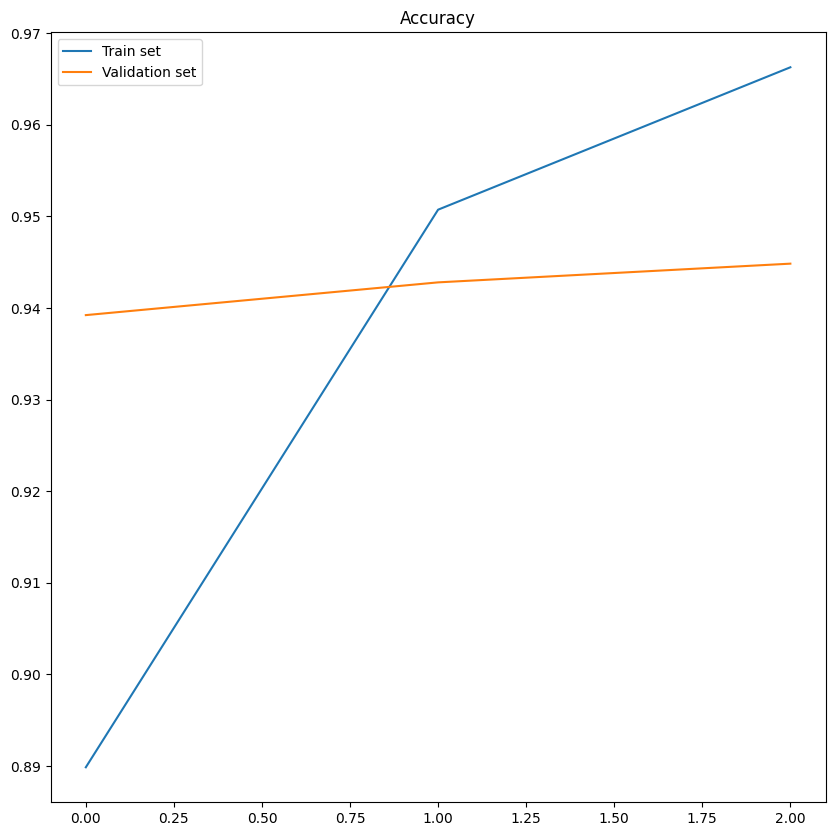

In [22]:
import matplotlib.pyplot as plt
# This plot will look much better if we train models with more epochs
plt.figure(figsize=(10, 10))
plt.title('Accuracy')

xaxis = np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'], label='Train set')
plt.plot(xaxis, history.history['val_accuracy'], label='Validation set')
plt.legend()

# Evaluation

In [23]:
from sklearn.metrics import classification_report

# Get the predicted labels
y_pred = np.argmax(model.predict(X_test), axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))



 1/62 [..............................] - ETA: 6:35


 2/62 [..............................] - ETA: 3:06


 3/62 [>.............................] - ETA: 3:06


 4/62 [>.............................] - ETA: 3:03


 5/62 [=>............................] - ETA: 3:00


 6/62 [=>............................] - ETA: 2:57


 7/62 [==>...........................] - ETA: 2:53


 8/62 [==>...........................] - ETA: 2:50


 9/62 [===>..........................] - ETA: 2:46


10/62 [===>..........................] - ETA: 2:43


11/62 [====>.........................] - ETA: 2:40


12/62 [====>.........................] - ETA: 2:36


13/62 [=====>........................] - ETA: 2:33


14/62 [=====>........................] - ETA: 2:29


15/62 [======>.......................] - ETA: 2:26


16/62 [======>.......................] - ETA: 2:23


17/62 [=======>......................] - ETA: 2:20


18/62 [=======>......................] - ETA: 2:17


19/62 [========>.....................] - ETA: 2:14


20/62 [========>.....................] - ETA: 2:11


21/62 [=========>....................] - ETA: 2:07


22/62 [=========>....................] - ETA: 2:04


23/62 [==========>...................] - ETA: 2:01


24/62 [==========>...................] - ETA: 1:58


25/62 [===========>..................] - ETA: 1:55


26/62 [===========>..................] - ETA: 1:52


27/62 [============>.................] - ETA: 1:49


28/62 [============>.................] - ETA: 1:45


29/62 [=============>................] - ETA: 1:42


30/62 [=============>................] - ETA: 1:39


31/62 [==============>...............] - ETA: 1:36


32/62 [==============>...............] - ETA: 1:33


33/62 [==============>...............] - ETA: 1:30


34/62 [===============>..............] - ETA: 1:26


35/62 [===============>..............] - ETA: 1:23


36/62 [================>.............] - ETA: 1:20


37/62 [================>.............] - ETA: 1:17


38/62 [=================>............] - ETA: 1:14


39/62 [=================>............] - ETA: 1:11


40/62 [==================>...........] - ETA: 1:08


41/62 [==================>...........] - ETA: 1:05


42/62 [===================>..........] - ETA: 1:02


43/62 [===================>..........] - ETA: 59s 


44/62 [====================>.........] - ETA: 55s


45/62 [====================>.........] - ETA: 52s


46/62 [=====================>........] - ETA: 49s


47/62 [=====================>........] - ETA: 46s


48/62 [======================>.......] - ETA: 43s


49/62 [======================>.......] - ETA: 40s


50/62 [=======================>......] - ETA: 37s


51/62 [=======================>......] - ETA: 34s


52/62 [========================>.....] - ETA: 31s


53/62 [========================>.....] - ETA: 27s


54/62 [=========================>....] - ETA: 24s


55/62 [=========================>....] - ETA: 21s


56/62 [==========================>...] - ETA: 18s


57/62 [==========================>...] - ETA: 15s


58/62 [===========================>..] - ETA: 12s


59/62 [===========================>..] - ETA: 9s 


60/62 [============================>.] - ETA: 6s


61/62 [============================>.] - ETA: 3s


62/62 [==============================] - ETA: 0s


62/62 [==============================] - 193s 3s/step


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       934
           1       0.94      0.96      0.95      1024

    accuracy                           0.94      1958
   macro avg       0.95      0.94      0.94      1958
weighted avg       0.94      0.94      0.94      1958




 1/62 [..............................] - ETA: 3:05


 2/62 [..............................] - ETA: 3:06


 3/62 [>.............................] - ETA: 3:01


 4/62 [>.............................] - ETA: 2:59


 5/62 [=>............................] - ETA: 2:56


 6/62 [=>............................] - ETA: 2:53


 7/62 [==>...........................] - ETA: 2:50


 8/62 [==>...........................] - ETA: 2:47


 9/62 [===>..........................] - ETA: 2:44


10/62 [===>..........................] - ETA: 2:41


11/62 [====>.........................] - ETA: 2:38


12/62 [====>.........................] - ETA: 2:35


13/62 [=====>........................] - ETA: 2:32


14/62 [=====>........................] - ETA: 2:29


15/62 [======>.......................] - ETA: 2:25


16/62 [======>.......................] - ETA: 2:22


17/62 [=======>......................] - ETA: 2:19


18/62 [=======>......................] - ETA: 2:16


19/62 [========>.....................] - ETA: 2:13


20/62 [========>.....................] - ETA: 2:10


21/62 [=========>....................] - ETA: 2:07


22/62 [=========>....................] - ETA: 2:03


23/62 [==========>...................] - ETA: 2:00


24/62 [==========>...................] - ETA: 1:57


25/62 [===========>..................] - ETA: 1:54


26/62 [===========>..................] - ETA: 1:51


27/62 [============>.................] - ETA: 1:48


28/62 [============>.................] - ETA: 1:45


29/62 [=============>................] - ETA: 1:42


30/62 [=============>................] - ETA: 1:39


31/62 [==============>...............] - ETA: 1:36


32/62 [==============>...............] - ETA: 1:33


33/62 [==============>...............] - ETA: 1:29


34/62 [===============>..............] - ETA: 1:26


35/62 [===============>..............] - ETA: 1:23


36/62 [================>.............] - ETA: 1:20


37/62 [================>.............] - ETA: 1:17


38/62 [=================>............] - ETA: 1:14


39/62 [=================>............] - ETA: 1:11


40/62 [==================>...........] - ETA: 1:08


41/62 [==================>...........] - ETA: 1:05


42/62 [===================>..........] - ETA: 1:01


43/62 [===================>..........] - ETA: 58s 


44/62 [====================>.........] - ETA: 55s


45/62 [====================>.........] - ETA: 52s


46/62 [=====================>........] - ETA: 49s


47/62 [=====================>........] - ETA: 46s


48/62 [======================>.......] - ETA: 43s


49/62 [======================>.......] - ETA: 40s


50/62 [=======================>......] - ETA: 37s


51/62 [=======================>......] - ETA: 34s


52/62 [========================>.....] - ETA: 30s


53/62 [========================>.....] - ETA: 27s


54/62 [=========================>....] - ETA: 24s


55/62 [=========================>....] - ETA: 21s


56/62 [==========================>...] - ETA: 18s


57/62 [==========================>...] - ETA: 15s


58/62 [===========================>..] - ETA: 12s


59/62 [===========================>..] - ETA: 9s 


60/62 [============================>.] - ETA: 6s


61/62 [============================>.] - ETA: 3s


62/62 [==============================] - ETA: 0s


62/62 [==============================] - 190s 3s/step


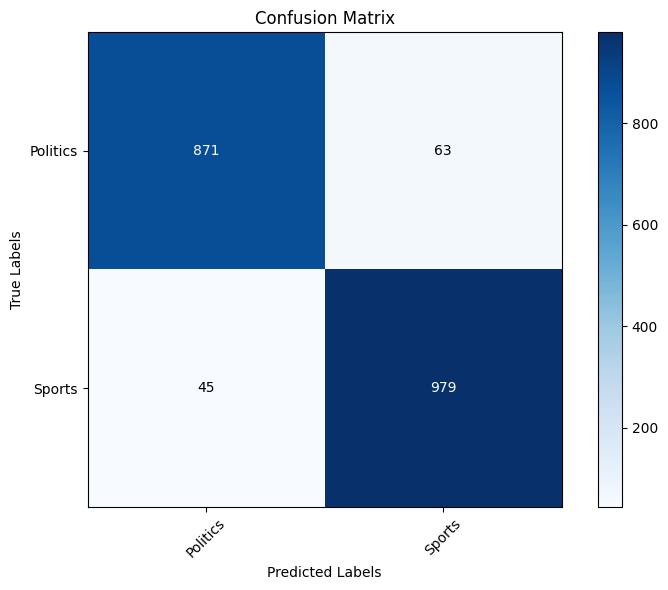

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Get the predicted labels
y_pred = np.argmax(model.predict(X_test), axis=1)

# Define the class labels
class_labels = ['Politics', 'Sports']  # Replace with your actual class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm_df, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Add text annotations
thresh = cm_df.max().max() / 2.0
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(cm_df.iloc[i, j], 'd'), ha="center", va="center",
                 color="white" if cm_df.iloc[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


# Predicting

In [25]:
# Read the CSV file
df = pd.read_csv('../input/deeptweets/test.csv')

# Preprocess the TweetText column
X_data = df['TweetText'].values
X_encoded = roberta_encode(X_data, tokenizer)

# Predict labels using the trained model
predictions = model.predict([X_encoded['input_word_ids'], X_encoded['input_mask']])

# Extract the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Map label IDs back to their corresponding labels
predicted_labels = [id_to_label[label_id] for label_id in predicted_labels]

# Store the predicted labels in the 'Label' column
df['Label'] = predicted_labels
df = df[["TweetId", "Label"]].reset_index(drop=True)
# Save the updated DataFrame to a new CSV file
df.to_csv('submission.csv', index=False)



 1/82 [..............................] - ETA: 8:45


 2/82 [..............................] - ETA: 4:05


 3/82 [>.............................] - ETA: 4:03


 4/82 [>.............................] - ETA: 4:00


 5/82 [>.............................] - ETA: 3:57


 6/82 [=>............................] - ETA: 3:55


 7/82 [=>............................] - ETA: 3:51


 8/82 [=>............................] - ETA: 3:48


 9/82 [==>...........................] - ETA: 3:44


10/82 [==>...........................] - ETA: 3:42


11/82 [===>..........................] - ETA: 3:39


12/82 [===>..........................] - ETA: 3:36


13/82 [===>..........................] - ETA: 3:32


14/82 [====>.........................] - ETA: 3:29


15/82 [====>.........................] - ETA: 3:26


16/82 [====>.........................] - ETA: 3:23


17/82 [=====>........................] - ETA: 3:20


18/82 [=====>........................] - ETA: 3:17


19/82 [=====>........................] - ETA: 3:14


20/82 [======>.......................] - ETA: 3:11


21/82 [======>.......................] - ETA: 3:08


22/82 [=======>......................] - ETA: 3:05


23/82 [=======>......................] - ETA: 3:02


24/82 [=======>......................] - ETA: 2:59


25/82 [========>.....................] - ETA: 2:56


26/82 [========>.....................] - ETA: 2:53


27/82 [========>.....................] - ETA: 2:50


28/82 [=========>....................] - ETA: 2:47


29/82 [=========>....................] - ETA: 2:43


30/82 [=========>....................] - ETA: 2:40


31/82 [==========>...................] - ETA: 2:37


32/82 [==========>...................] - ETA: 2:34


33/82 [===========>..................] - ETA: 2:31


34/82 [===========>..................] - ETA: 2:28


35/82 [===========>..................] - ETA: 2:25


36/82 [============>.................] - ETA: 2:22


37/82 [============>.................] - ETA: 2:19


38/82 [============>.................] - ETA: 2:15


39/82 [=============>................] - ETA: 2:12


40/82 [=============>................] - ETA: 2:09


41/82 [==============>...............] - ETA: 2:06


42/82 [==============>...............] - ETA: 2:03


43/82 [==============>...............] - ETA: 2:00


44/82 [===============>..............] - ETA: 1:57


45/82 [===============>..............] - ETA: 1:54


46/82 [===============>..............] - ETA: 1:51


47/82 [================>.............] - ETA: 1:48


48/82 [================>.............] - ETA: 1:45


49/82 [================>.............] - ETA: 1:42


50/82 [=================>............] - ETA: 1:38


51/82 [=================>............] - ETA: 1:35


52/82 [==================>...........] - ETA: 1:32


53/82 [==================>...........] - ETA: 1:29


54/82 [==================>...........] - ETA: 1:26


55/82 [===================>..........] - ETA: 1:23


56/82 [===================>..........] - ETA: 1:20


57/82 [===================>..........] - ETA: 1:17


58/82 [====================>.........] - ETA: 1:14


59/82 [====================>.........] - ETA: 1:11


60/82 [====================>.........] - ETA: 1:08


61/82 [=====================>........] - ETA: 1:05


62/82 [=====================>........] - ETA: 1:01


63/82 [======================>.......] - ETA: 58s 


64/82 [======================>.......] - ETA: 55s


65/82 [======================>.......] - ETA: 52s


66/82 [=======================>......] - ETA: 49s


67/82 [=======================>......] - ETA: 46s


68/82 [=======================>......] - ETA: 43s


69/82 [========================>.....] - ETA: 40s


70/82 [========================>.....] - ETA: 37s


71/82 [========================>.....] - ETA: 34s


72/82 [=========================>....] - ETA: 30s


73/82 [=========================>....] - ETA: 27s


74/82 [==========================>...] - ETA: 24s


75/82 [==========================>...] - ETA: 21s


76/82 [==========================>...] - ETA: 18s


77/82 [===========================>..] - ETA: 15s


78/82 [===========================>..] - ETA: 12s


79/82 [===========================>..] - ETA: 9s 


80/82 [============================>.] - ETA: 6s


81/82 [============================>.] - ETA: 3s


82/82 [==============================] - ETA: 0s


82/82 [==============================] - 256s 3s/step


<h4>Realised by Nour Errahali</h4>
<h4>Master's Student in Computer Science and Complex Systems Modeling</h4>